# Data Cleaning

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'/home/laksh/Downloads/perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns=['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.shape

(107, 2)

In [8]:
##In order to check whether Data is having NULL values.
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [9]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [11]:
df.drop(106,axis=0,inplace=True)

In [12]:
df.drop(105,axis=0,inplace=True)

In [13]:
df.shape

(105, 2)

In [14]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [16]:
##Month is of Object type, so we need to change it in Date-time format
df['Month']=pd.to_datetime(df['Month'])

In [17]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [18]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [19]:
## We need to set our index as Month column
df.set_index('Month',inplace=True)

In [20]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [21]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# <h1> Visualize our Sales Clumn</h1>

<AxesSubplot:xlabel='Month'>

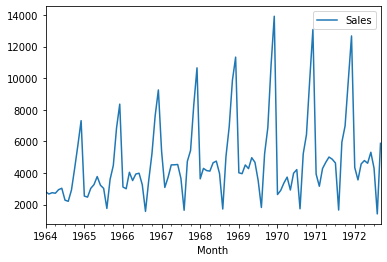

In [23]:
df.plot()

In [24]:
##Seasonal Data

# Checking Stationary Trend in Data

In [27]:
## Augmented Dfuller test
## If p-value is less than 0.5, I can say tha my data is stationary
!pip install statsmodels

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
## Hypothesis Testing

In [32]:
adfuller(df['Sales'])

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [33]:
## 0.36 is the pvalue which is clearly greater than 0.05.
## Hence the data is not stationary

In [34]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels=['ADF test stats','p-value','Lags used','Number of obs used']
    
    for value,label in zip(result,labels):
        print('{} : {} '.format(label,value))
    if result[1]<0.05:
        print('Reject NULL hypo, data is stationary')
    else:
        print('Accept NULL hypo, data is not stationary')

In [35]:
adfuller_test(df['Sales'])

ADF test stats : -1.8335930563276228 
p-value : 0.363915771660245 
Lags used : 11 
Number of obs used : 93 
Accept NULL hypo, data is not stationary


# converting into stationary data

In [36]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [37]:
df['Sales first diff.']=df['Sales']-df['Sales'].shift(1)

In [38]:
df.head()

,Sales,Sales first diff.
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [39]:
df['Seasonal first diff.']=df['Sales']-df['Sales'].shift(12)

In [40]:
df.head(20)

,Sales,Sales first diff.,Seasonal first diff.
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [41]:
adfuller_test(df['Seasonal first diff.'].dropna())

ADF test stats : -7.626619157213164 
p-value : 2.060579696813685e-11 
Lags used : 0 
Number of obs used : 92 
Reject NULL hypo, data is stationary


<AxesSubplot:xlabel='Month'>

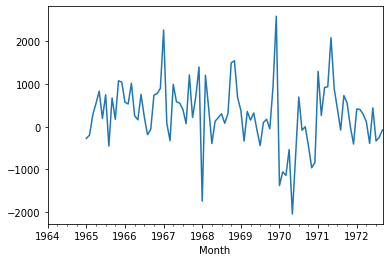

In [42]:
df['Seasonal first diff.'].plot()

# ARIMA model

In [43]:
##AR + I + MA
## (p,d,q)
## p -> pacf graph
## d=I
## q = acf graph

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [46]:
import matplotlib.pyplot as plt

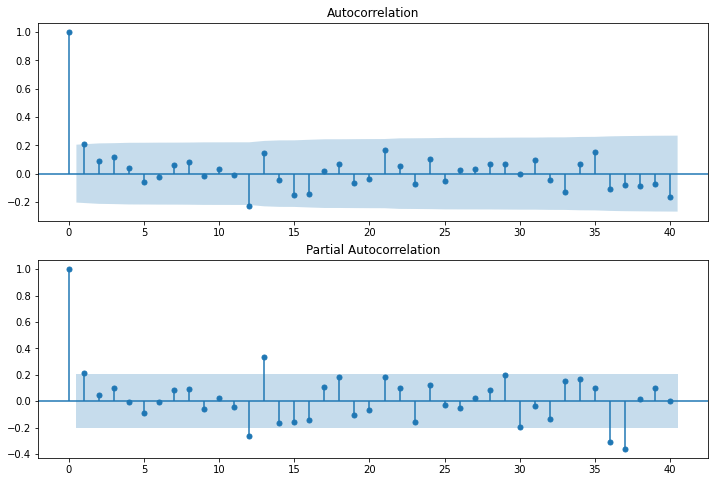

In [50]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first diff.'].iloc[13:],lags=40,ax=ax2)


In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
model=ARIMA(df['Sales'],order=(1,1,1))

/home/laksh/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/laksh/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequen

In [54]:
model=model.fit()

/home/laksh/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.263
Date:                Sun, 15 Aug 2021   AIC                           1910.251
Time:                        01:01:16   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7843     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
df.shape

(105, 3)

In [57]:
df['forecast']=model.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

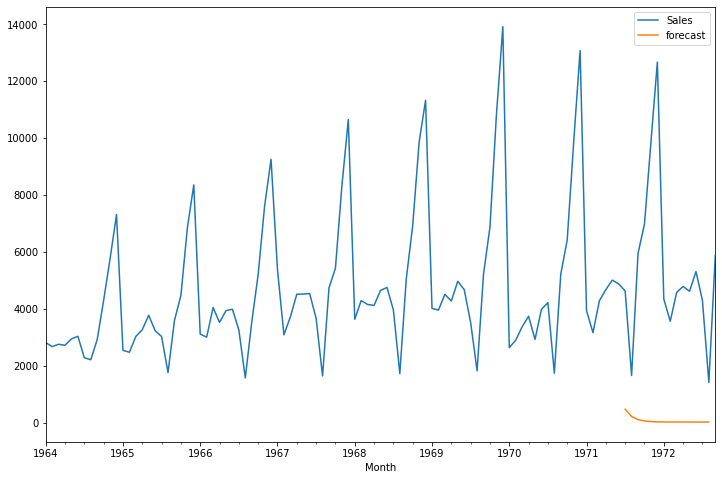

In [58]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [59]:
## Seasonal DATA -> ARIMA is not the model we should use

In [60]:
## SARIMAX model

# SARIMAX Model

In [61]:
import statsmodels.api as sm

In [62]:
## (p,d,q,shift_value)

In [64]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

/home/laksh/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/laksh/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
results=model.fit()

In [66]:
df['forecast_SARIMAX']=results.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

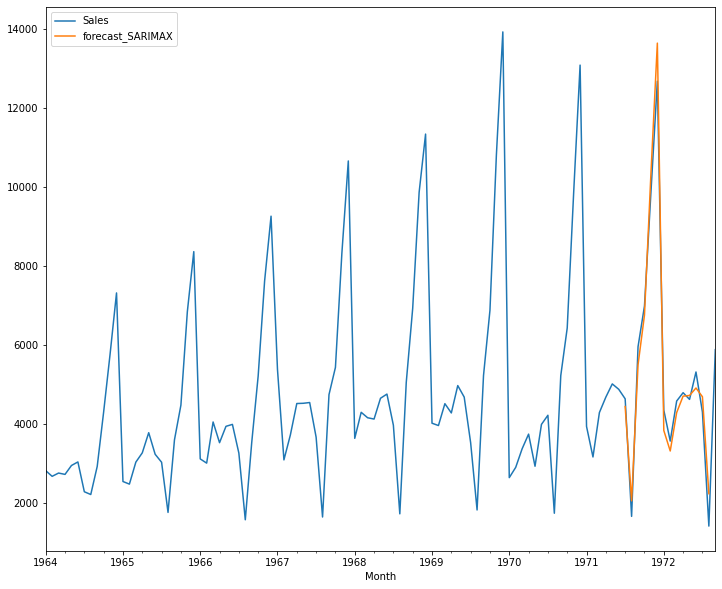

In [67]:
df[['Sales','forecast_SARIMAX']].plot(figsize=(12,10))

In [68]:
from pandas.tseries.offsets import DateOffset
## add, for 24 months

In [69]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [71]:
future_dates=[df.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [72]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [73]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [74]:
future_dataset.tail()

,Sales,Sales first diff.,Seasonal first diff.,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [75]:
future_df=pd.concat([df,future_dataset])

In [76]:
future_df.shape

(128, 5)

In [77]:
future_df['forecast_SARIMAX2']=results.predict(start=104,end=124,dynamic=True)

<AxesSubplot:>

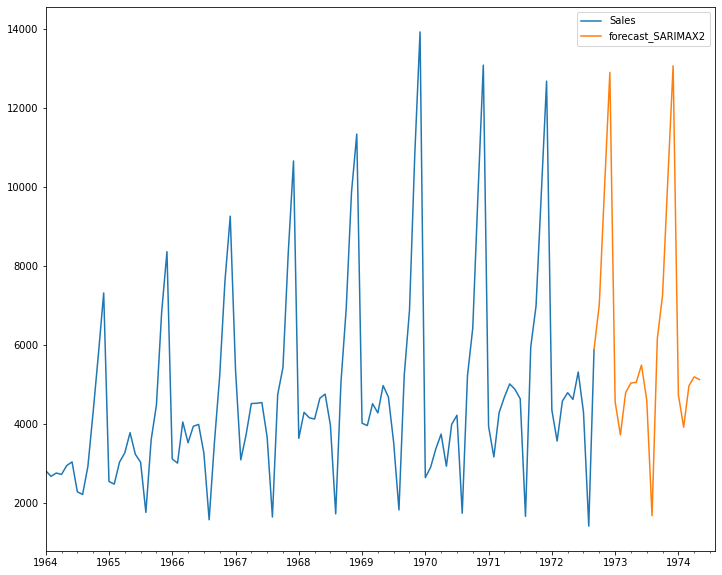

In [78]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,10))